# Assignment 5
### Do all four questions.

#### Chase Cha (yht7nf)

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [2]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [3]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

e_4 = A @ e_1
e_5 = A @ e_2
e_6 = A @ e_3

print(f"A @ e_1: {e_4}")
print(f"A @ e_2: {e_5}")
print(f"A @ e_3: {e_6}")

A @ e_1: [1 4 7]
A @ e_2: [2 5 8]
A @ e_3: [3 6 9]


#### Answer
After multiplying $A$ times each of the above vectors, it is clear that the columns of A are getting selected each time depending on where the 1 appears within the vector. Since this matrix multiplication multiplies a matrix row by the column vector, for the first vector [1, 0, 0] we only keep the value in the first columns for each of the matrix rows, or 1, 4, and 7 because the 0s in the vector cause everything in the second and third columns to multiply to 0. If the column vector has a 1 in the second column, then we would select all values in the second column of matrix $A$, or 2, 5, and 8.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [4]:
u = np.ones(3)

U = A @ u

U

array([ 6., 15., 24.])

#### Answer
When multiplying $A$ by a vector of 1s, the result will be the sum of the values in each row of matrix $A$. This occurs because when doing the multiplication, we will take row 1 of matrix $A$ and multiply it by the vector of 1s, or $1*1 + 2*1 + 3*1 = 6$. Following that for each row in matrix $A$, we get $4*1 + 5*1 + 6*1 = 15$ and $7*1 + 8*1 + 9*1 = 24$. In other words, we are summing each row in matrix A as we are multplying the matrix rows with our vector of 1s

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [5]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])

X = A @ x

X


array([-2,  4, 11])

#### Answer
When you multiply the identity matrix $A$ times $x$, the answer will be equal to $x$. Similarly, when you multiply an identity matrix times any vector the result will always be equal to the vector. This result occurs because the diagonal of 1s in an identity matrix causes us to only select the same row/column value as we multiply the rows of the matrix by the vector. In other words, when multiplying the first row by the vector we see $1*-2 + 0*4 + 0*11 = -2$. Here, the 1 on the diagonal caused the multiplication to result in only the value in column 1 of the vector because that is where the 1 appears. Similarly, as we move on to row 2 we will only select the value in column 2 because that is where the 1 appears.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [6]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

X = A @ x

print(X)

B = np.array([ [0,1,0],
              [0,0,1],
              [1,0,0]])

C = B @ x

C



[11 -2  4]


array([ 4, 11, -2])

#### Answer
As seen above, the two matrices whose rows sum to 1, but the 1s are not on the diagonal permute the values of $x$ from their original location. From the logic discussed in the previous question, the location of the 1 in a row/column determines which value of $x$ to select for that particular column in the resulting vector. Thus, if we move the 1s off the diagonal, we will select a different value of $x$ than what was originally there in $x$

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [7]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)
print("")

Q = A @ e_1
Y = A @ e_2
Z = A @ e_3

print(f"e_1: {Q}")
print(f"e_2: {Y}")
print(f"e_3: {Z}")

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]

e_1: [0.50052958 0.02574731 0.47372311]
e_2: [0.24049286 0.39251588 0.36699127]
e_3: [0.18358131 0.37907577 0.43734292]


#### Answer
Looking at the results from multiplying $A$ times $e_1$, we see that $e_1 = (1, 0, 0)$ meaning that intially we are in state 1 (assuming column 1 = state 1). Then, the result of the multiplication shows the proportion of observations that move from state 1 to all other states, or simply column 1 from matrix $A$ as shown above. In other words, the multiplication $Ae_i$ gives the distribution of states after one transition starting from state i.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [12]:
def repeated(A, e, k=5):
  v = e.copy()
  results = []

  for i in range(1, k+1):
    v = A @ v
    print(v)

print("e1:")
repeated(A, e_1)
print()

print("e2:")
repeated(A, e_2)
print()

print("e3:")
repeated(A, e_3)
print()




e1:
[0.50052958 0.02574731 0.47372311]
[0.34368862 0.20257047 0.45374091]
[0.30404142 0.26036337 0.43559521]
[0.29476439 0.27514859 0.43008701]
[0.29266551 0.27862515 0.42870935]

e2:
[0.24049286 0.39251588 0.36699127]
[0.28214379 0.29937825 0.41847795]
[0.29004438 0.28341002 0.42654561]
[0.29163968 0.2804039  0.42795643]
[0.29197422 0.27979983 0.42822595]

e3:
[0.18358131 0.37907577 0.43734292]
[0.26334088 0.31930609 0.41735304]
[0.28521895 0.29032145 0.4244596 ]
[0.29050361 0.28220175 0.42729464]
[0.29171646 0.2802254  0.42805814]



#### Answer
For each starting vector, I get the same answer from the previous question, or simply the proportion of observations that move from state j to a certain state i based on the vector (either state 1, 2, or 3). However, as we continually multiply by the updated proportions, we see that across all three vectors $e_1, e_2, e_3$ the results become very similar at about $[2.92, 2.8, .43]$. Thus, the chain is converging to a staionary distribution where the long run state probabilities are independent of the initial state.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [15]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

2.1

In [30]:
init = init = np.array([1, 0])

U = T @ init

U

array([0.25, 0.75])

2.1 Answer

The object we are looking at is the proportions for when we transition from state 1 to another state. Thus, based on the result of the formula and above code chunk, we transition from state 1 to state 1 25% of the time and from state 1 to state 2 75% of the time.

2.2

In [31]:
init = np.array([1, 0])

for i in range(2):
  U = T @ init
  print(U)
  init = U


[0.25 0.75]
[0.4375 0.5625]


2.2 Answer

When multiplying by T again, we do not get a column of T but rather a forecast of what state we will be in after two tranitions assuming we started in state 1 as our initial condition. Thus, after two transitions or in period 2, there is a 43.75% chance of being in state 1 and a 56.25% chance of being in state 2.

2.3

In [32]:
init = np.array([1, 0])

for i in range(20):
  U = T @ init
  print(U)
  init = U

[0.25 0.75]
[0.4375 0.5625]
[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]
[0.39999986 0.60000014]
[0.40000004 0.59999996]
[0.39999999 0.60000001]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]


After about 14 transitions/periods, the values converge on 0.4 and 0.6 without changing much further. Here we have reached an equilibrium distribution where the long run state probability is independent of our initial condition.

2.4

In [33]:
init = np.array([0, 1])

for i in range(20):
  U = T @ init
  print(U)
  init = U

[0.5 0.5]
[0.375 0.625]
[0.40625 0.59375]
[0.3984375 0.6015625]
[0.40039062 0.59960938]
[0.39990234 0.60009766]
[0.40002441 0.59997559]
[0.3999939 0.6000061]
[0.40000153 0.59999847]
[0.39999962 0.60000038]
[0.4000001 0.5999999]
[0.39999998 0.60000002]
[0.40000001 0.59999999]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]
[0.4 0.6]


Based on the above, we do not get a different result because in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

3.1

In [14]:
import pandas as pd

weather = pd.read_csv("cville_weather.csv")

weather.isna().sum()

STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTRIBUTES    399
PRCP                12
PRCP_ATTRIBUTES     12
SNOW               188
SNOW_ATTRIBUTES    188
SNWD               410
SNWD_ATTRIBUTES    410
dtype: int64

Based on the above missing value counts, I would say that missing data is most definitely an issue since there are only 411 observations in this dataset, and many columns like DAPR have missing values for 399 of these observations. Similarly, columns related to SNWD have 410 missing values.

3.2

In [15]:
weather['rain'] = (weather['PRCP'] > 0).astype(int)
weather['rain']

0      1
1      1
2      1
3      1
4      0
      ..
406    0
407    0
408    0
409    0
410    0
Name: rain, Length: 411, dtype: int64

3.3

In [16]:
sequence = weather["rain"].to_numpy()
states = list(np.unique(sequence))

S = len(states)
T = len(sequence)
tr_counts = np.zeros( (S, S) )

for t in range(1,T): # For each transition
    # Current and next tokens:
    x_tm1 = sequence[t-1] # previous state
    x_t = sequence[t] # current state
    # Determine transition indices:
    index_from = states.index(x_tm1)
    index_to = states.index(x_t)
    # Update transition counts:
    tr_counts[index_to, index_from] += 1

print(f'\nTransition Counts:\n {tr_counts}')

# Sum the transition counts by row:
sums = tr_counts.sum(axis=0, keepdims=True)
print(f'\nState Counts: \n {sums}')

# Sum the transition counts by row:
print(f'\nState proportions: \n {sums/np.sum(sums)}')

# Normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                            out=np.zeros_like(tr_counts), 
                            where= sums!=0)

tr_pr_1 = tr_pr # Save transition matrix for later

print(f'\nTransition Proportions:')
TM = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
TM


Transition Counts:
 [[169.  63.]
 [ 62. 116.]]

State Counts: 
 [[231. 179.]]

State proportions: 
 [[0.56341463 0.43658537]]

Transition Proportions:


,0,1
0,0.73,0.35
1,0.27,0.65


3.4:

If it was rainy yesterday, that means we are in state 1 for precipitation. Thus, based on the transition matrix computed previously there is a 65% chance that if it was rainy yesterday it will be rainy today. If it was clear yesterday, then there is a 27% chance that it will rain today.


3.5 Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?


In [27]:
init = np.array([0, 1])

for i in range(40):
  U = TM @ init
  print(U.to_list())
  init = U

[0.35, 0.65]
[0.483, 0.517]
[0.5335399999999999, 0.46646000000000004]
[0.5527451999999999, 0.4472548]
[0.5600431759999999, 0.439956824]
[0.5628164068799999, 0.43718359312]
[0.5638702346143999, 0.4361297653856]
[0.5642706891534719, 0.435729310846528]
[0.5644228618783192, 0.43557713812168064]
[0.5644806875137612, 0.4355193124862386]
[0.5645026612552292, 0.43549733874477065]
[0.564511011276987, 0.43548898872301284]
[0.564514184285255, 0.4354858157147449]
[0.5645153900283968, 0.43548460997160304]
[0.5645158482107907, 0.43548415178920913]
[0.5645160223201005, 0.43548397767989944]
[0.564516088481638, 0.4354839115183618]
[0.5645161136230223, 0.43548388637697744]
[0.5645161231767484, 0.4354838768232514]
[0.5645161268071643, 0.4354838731928355]
[0.5645161281867224, 0.43548387181327747]
[0.5645161287109544, 0.4354838712890454]
[0.5645161289101626, 0.4354838710898372]
[0.5645161289858617, 0.4354838710141381]
[0.5645161290146273, 0.43548387098537245]
[0.5645161290255583, 0.43548387097444147]
[0.56

Starting from a clear day, it converges to a fixed result after 38 transitions or periods. Starting from a rainy day, it also takes 38 transitions or periods to converge to a fixed result.

3.6 Conditional on being rainy, plot a KDE of the `PRCP` variable.

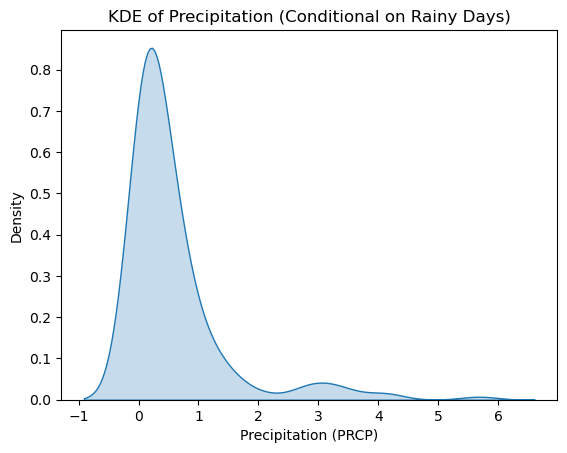

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

rainy_days = weather[weather["rain"] == 1]  # filter only rainy days

# Plot KDE for PRCP on rainy days
sns.kdeplot(data=rainy_days, x="PRCP", fill=True)

plt.title("KDE of Precipitation (Conditional on Rainy Days)")
plt.xlabel("Precipitation (PRCP)")
plt.ylabel("Density")
plt.show()

3.7 Describe one way of making your model better for forecasting and simulation the weather.

Currently, our two state Markov chain only consideres whether it was rainy yesterday in order to forecast/simulate the weather. In order to improve our model, we can include more information by increasing the order of the chain, and in turn increasing the number of states. For example, a 2nd order Markov chain could have the states (0, 1), (1, 0), (0, 0), and (1, 1) which considers if it was rainy over the past two days. By doing so, our model may be better for forecasting and simulating weather.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

4.1

In [16]:
import pickle
import numpy as np

with open('./taxicab.pkl', 'rb') as file:
  data = pickle.load(file)

# neighborhoods = [np.unique(trip) for trip in data]

states = set()
for trip in data:
  new_states = set(trip)
  states = states.union(new_states)

states = list(states)
states

['Stuyvesant Town',
 'Murray Hill',
 'Civic Center',
 'Harlem',
 'Roosevelt Island',
 'West Village',
 'Chelsea',
 'Tribeca',
 "Hell's Kitchen",
 'Flatiron District',
 'NoHo',
 'Gramercy',
 'Inwood',
 'Little Italy',
 'Washington Heights',
 'Two Bridges',
 'Upper East Side',
 'Lower East Side',
 "Randall's Island",
 'Theater District',
 'Outside Manhattan',
 'Battery Park City',
 'East Harlem',
 'Midtown',
 'Chinatown',
 'Financial District',
 'Ellis Island',
 'Kips Bay',
 'Central Park',
 'Nolita',
 'SoHo',
 'Liberty Island',
 'Greenwich Village',
 'Morningside Heights',
 'Marble Hill',
 'Governors Island',
 'Upper West Side',
 'East Village']

Based on the above states, the state space for the taxicab data consists of neighborhoods in Manhattan. As stated in class, the data and sequences are already clean in a list of pandas series objects each representing a sequence of neighborhoods for a single taxi trajectory. In the next question, we loop over these trips to create a transition matrix and heatmap.

4.2 Transition Matrix and Heat Map

In [17]:
S = len(states)

# Initialize transition count matrix
tr_counts = np.zeros((S, S))

# Count transitions across all trajectories
for trip in data:
    trip = trip.dropna().to_numpy()
    for t in range(1, len(trip)):
        prev_state = trip[t-1]
        curr_state = trip[t]
        i = states.index(prev_state)
        j = states.index(curr_state)
        tr_counts[j, i] += 1

# Compute total outgoing transitions per state
sums = tr_counts.sum(axis=0, keepdims=True)

# Normalize to get transition probabilities (columns sum to 1)
tr_pr = np.divide(
    tr_counts, 
    sums, 
    out=np.zeros_like(tr_counts), 
    where=sums != 0
)

# Convert to DataFrame for readability
TM = pd.DataFrame(np.round(tr_pr, 3), index=states, columns=states)

print("Transition Proportions")
TM

Transition Proportions


,Stuyvesant Town,Murray Hill,Civic Center,Harlem,Roosevelt Island,West Village,Chelsea,Tribeca,Hell's Kitchen,Flatiron District,...,Central Park,Nolita,SoHo,Liberty Island,Greenwich Village,Morningside Heights,Marble Hill,Governors Island,Upper West Side,East Village
Stuyvesant Town,0.144,0.006,0.004,0.001,0.003,0.003,0.004,0.003,0.002,0.006,...,0.001,0.005,0.003,0.0,0.006,0.001,0.000,0.083,0.001,0.020
Murray Hill,0.043,0.196,0.015,0.005,0.022,0.015,0.021,0.012,0.014,0.042,...,0.009,0.018,0.015,0.0,0.020,0.004,0.006,0.000,0.007,0.029
Civic Center,0.002,0.001,0.095,0.000,0.001,0.002,0.001,0.010,0.001,0.002,...,0.000,0.004,0.006,0.0,0.003,0.001,0.000,0.000,0.000,0.002
Harlem,0.003,0.003,0.002,0.215,0.005,0.004,0.005,0.002,0.009,0.003,...,0.012,0.003,0.003,0.0,0.003,0.061,0.061,0.000,0.018,0.004
Roosevelt Island,0.000,0.000,0.000,0.000,0.122,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000
West Village,0.021,0.017,0.038,0.010,0.012,0.289,0.062,0.080,0.028,0.035,...,0.009,0.049,0.088,0.0,0.085,0.008,0.018,0.000,0.011,0.035
Chelsea,0.069,0.058,0.050,0.027,0.026,0.148,0.335,0.076,0.115,0.154,...,0.032,0.059,0.085,0.0,0.109,0.026,0.030,0.167,0.037,0.066
Tribeca,0.007,0.007,0.136,0.003,0.006,0.028,0.014,0.250,0.009,0.012,...,0.004,0.019,0.041,0.0,0.020,0.003,0.004,0.000,0.004,0.011
Hell's Kitchen,0.019,0.029,0.016,0.041,0.017,0.037,0.073,0.025,0.283,0.032,...,0.036,0.019,0.024,0.0,0.024,0.038,0.075,0.000,0.075,0.020
Flatiron District,0.025,0.024,0.011,0.004,0.007,0.021,0.030,0.013,0.010,0.158,...,0.007,0.013,0.016,0.0,0.023,0.003,0.002,0.000,0.005,0.018


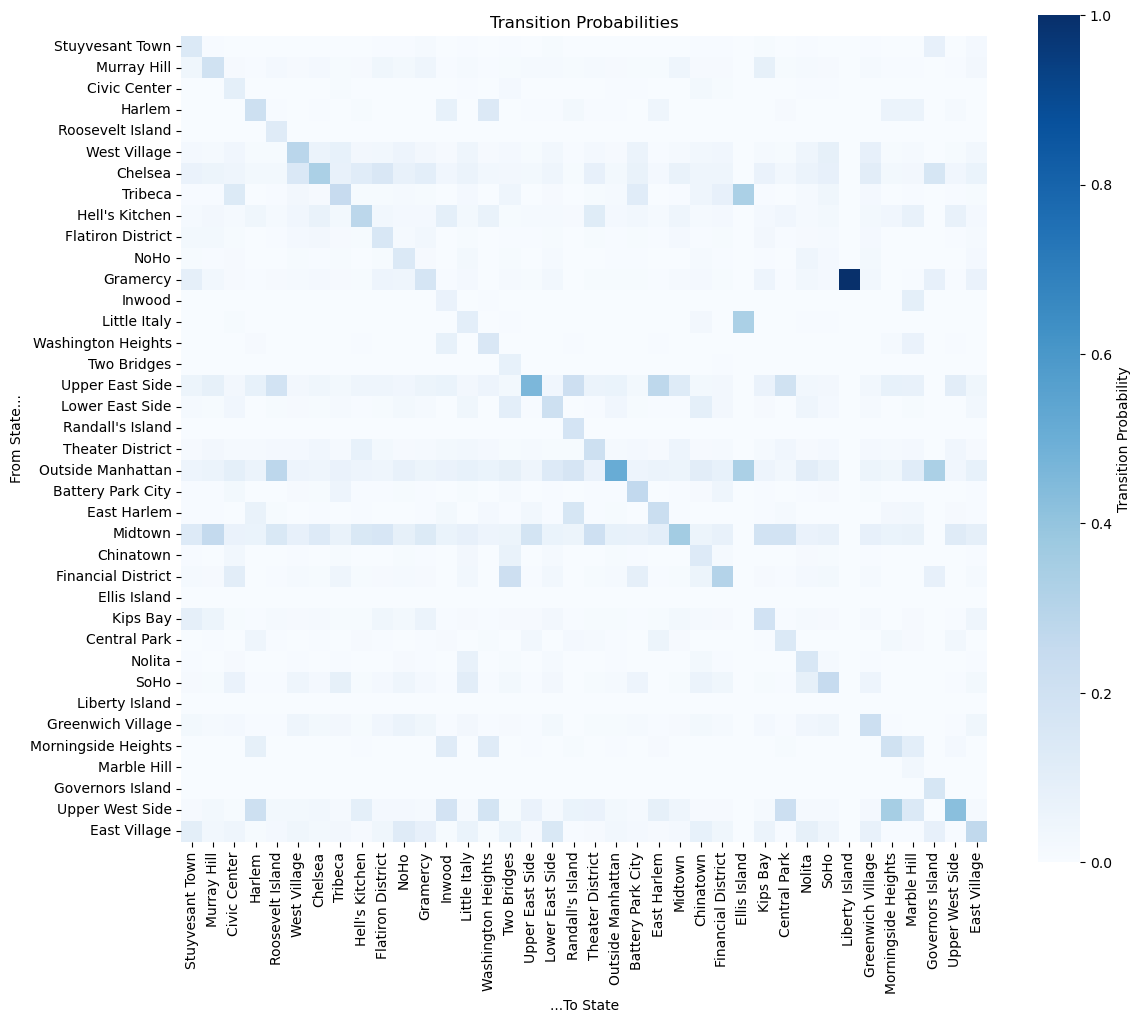

In [18]:
plt.figure(figsize=(13, 11))
sns.heatmap(tr_pr, 
            cmap='Blues',
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.show()

Based on the heatmap and transition matrix, the most common route appears to be from Gramercy to Liberty Island as no other routes go to Liberty Island. In addition, it is common for a taxi to operate in the same neighborhood and not run trips across neighborhoods, as shown by the diagonal in the heatmap.

4.3 Explain why taxicabs are most likely order 1, and not 2 or more.

Taxicabs are most likely order 1 and not 2 or more because once a cab reaches a neighborhood, its next trip is almost entirely dependent on solely that neighborhood. In other words, the passenger demand, traffic, and proximity to common destinations is determined by a cab's current neighborhood and is likely not very dependent on its past trip history. Since a cab does not know where it is going until it picks up a passenger in a specific neighborhood, the preferences or trends for passangers in a neighborhood determine the most likely next trip. Because of this, a taxicab is likely order 1 and not 2 or more.

4.4 Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips

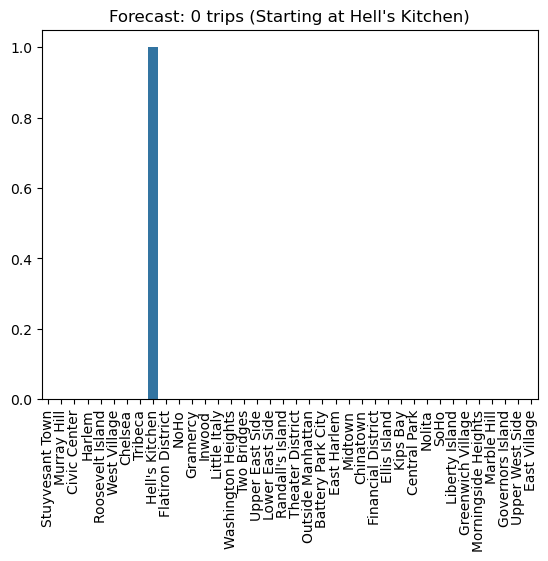

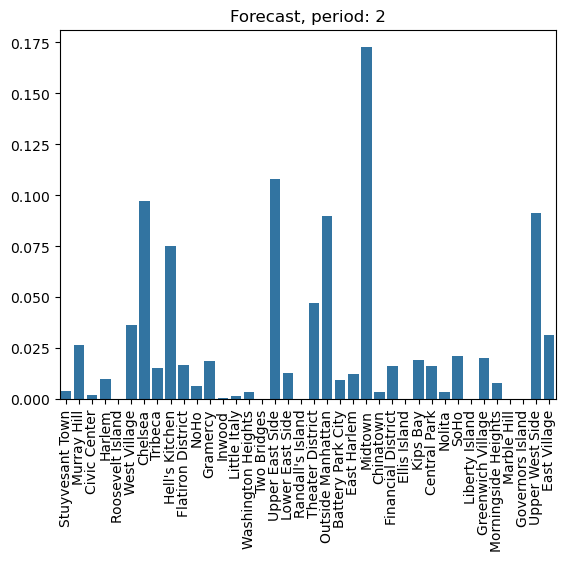

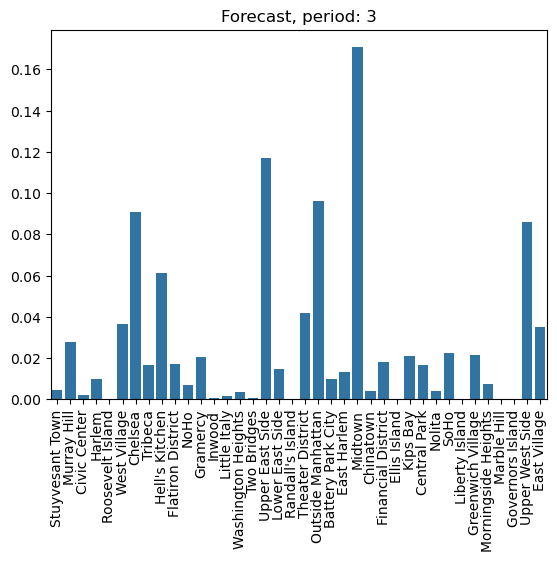

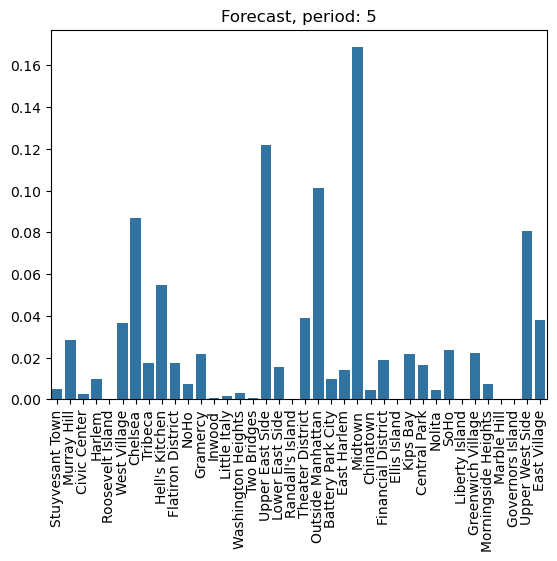

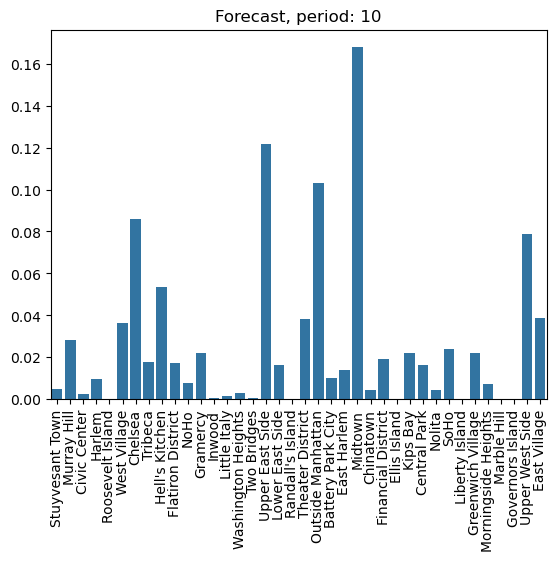

In [22]:
np.random.seed(100)

# Start at Hell's Kitchen
initial_state = "Hell's Kitchen"
state_index = states.index(initial_state)

# Initial probability distribution (100% in Hell's Kitchen)
density = np.zeros(len(states))
density[state_index] = 1

# Plot initial state distribution
sns.barplot(x=states, y=density)
plt.title("Forecast: 0 trips (Starting at Hell's Kitchen)")
plt.xticks(rotation=90)
plt.show()

forecast_horizons = [2, 3, 5, 10]

forecast = [initial_state]
for t in range(11):
    density = tr_pr @ density
    forecast.append(density) # Append new forecast
    if t in forecast_horizons:
        sns.barplot(x=states,y=density).set(title=f'Forecast, period: {str(t)}')
        plt.xticks(rotation=90)
        plt.show()

4.5 Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

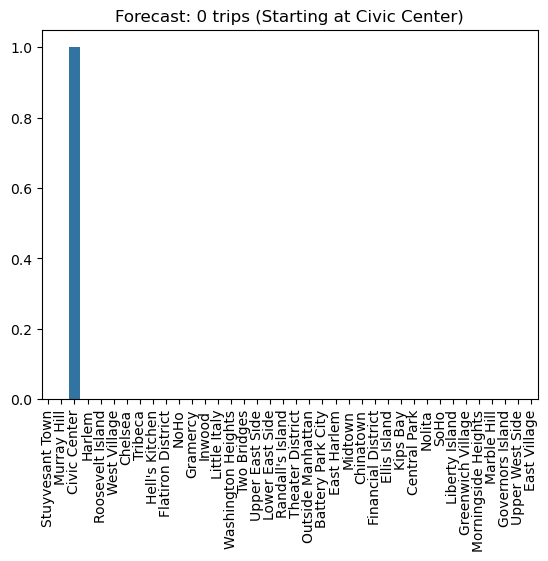

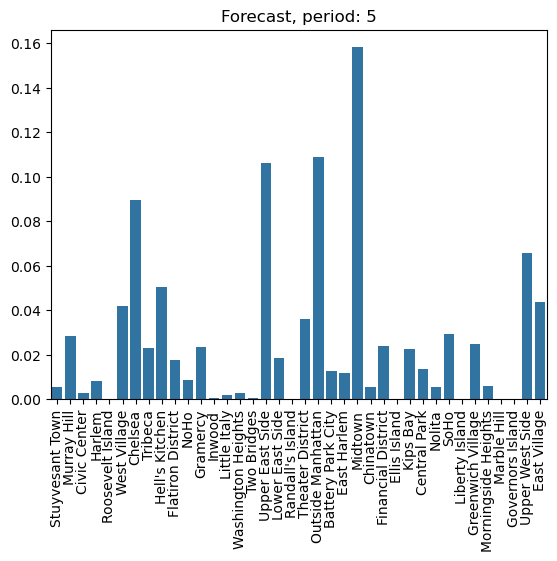

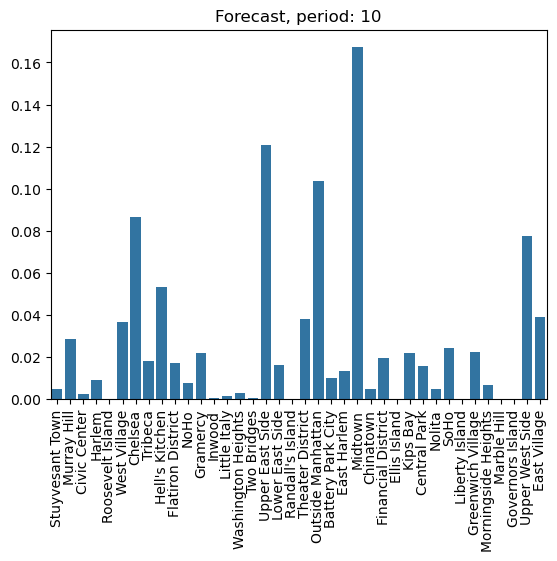

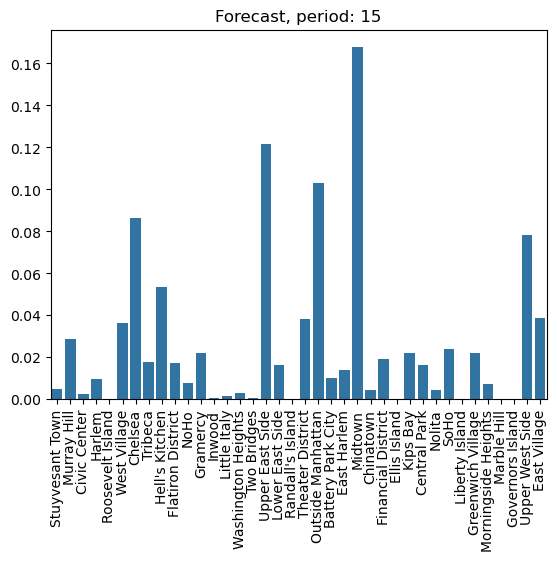

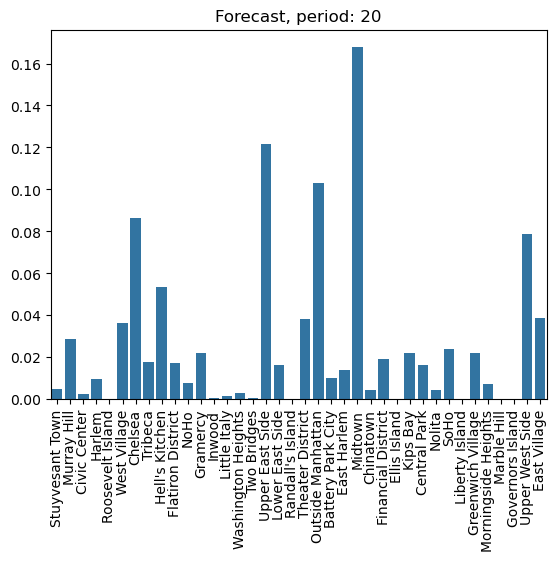

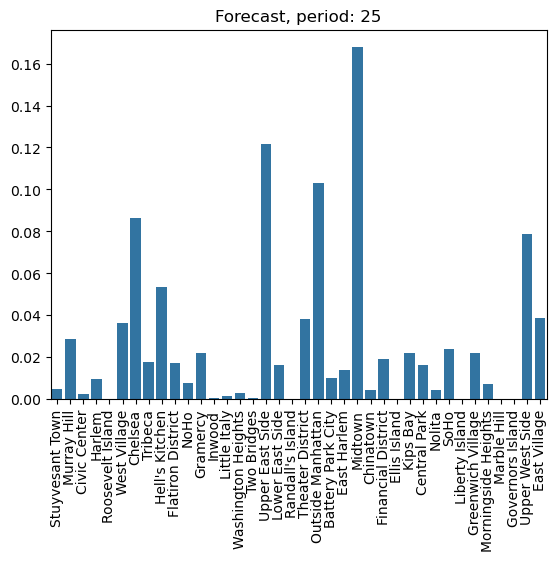

In [29]:
np.random.seed(123)

# Random Start
initial_state = np.random.choice(states)
state_index = states.index(initial_state)

# Initial probability distribution (100% in Hell's Kitchen)
density = np.zeros(len(states))
density[state_index] = 1

# Plot initial state distribution
sns.barplot(x=states, y=density)
plt.title(f"Forecast: 0 trips (Starting at {initial_state})")
plt.xticks(rotation=90)
plt.show()

n_sim = 26

forecast = [initial_state]
for t in range(1, n_sim):
    density = tr_pr @ density
    forecast.append(density) # Append new forecast
    if t % 5 == 0:
        sns.barplot(x=states,y=density).set(title=f'Forecast, period: {str(t)}')
        plt.xticks(rotation=90)
        plt.show()

Based on the above forecasts, it is clear that cabs spend the most of their time working in Midtown as this state has the highest proportion once the chain reaches a stationary distribution, meaning that the most likely neighborhood for a trip/chain to be in is Midtown.